# KALEEM WAHEED  18L-1811 Project Part C

### Import Libraries

In [202]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
from time import time
import matplotlib.pyplot as plt
import matplotlib
from keras.callbacks import TensorBoard
import os
from keras.optimizers import SGD
from os import listdir
from os.path import join, basename
from keras.preprocessing.image import ImageDataGenerator

# Enable Intellisense

In [205]:
%config IPCompleter.greedy=True

## Global Variable 

In [206]:
trainCats='CatsandDogs/cats'
trainDogs='CatsandDogs/dogs'
labels=[]
data=[]
im_width=64
im_height=64
batchsize=400
epochs=5

# images Name Directory

In [207]:
trainImageFilesOfCats=[f for f in  os.listdir(trainCats) if os.path.isfile(os.path.join(trainCats,f))]
trainImageFilesOfDogs=[f for f in  os.listdir(trainDogs) if os.path.isfile(os.path.join(trainDogs,f))]

# PreProcessing Cat Data

In [208]:
progress=0
for fileNameOfCat in trainImageFilesOfCats:
    imageFileOfCat = str(trainCats+'/'+fileNameOfCat)
    imageOfCat=cv2.imread(imageFileOfCat,cv2.IMREAD_GRAYSCALE)
    newImage=cv2.resize(imageOfCat,(im_width,im_height))
    data.append(newImage)
    labels.append(0)
    progress=progress+1
    if progress % 1000==0:
        print('progress= ' + str(progress)+' <<Imges done')

progress= 1000 <<Imges done
progress= 2000 <<Imges done
progress= 3000 <<Imges done
progress= 4000 <<Imges done
progress= 5000 <<Imges done
progress= 6000 <<Imges done
progress= 7000 <<Imges done
progress= 8000 <<Imges done
progress= 9000 <<Imges done
progress= 10000 <<Imges done
progress= 11000 <<Imges done
progress= 12000 <<Imges done


# PreProcessing Dog Data

In [209]:
progress=0
for fileNameOfDog in trainImageFilesOfDogs:
    imageFileOfDog = str(trainDogs+'/'+fileNameOfDog)
    imageOfDog=cv2.imread(imageFileOfDog,cv2.IMREAD_GRAYSCALE)
    newImage=cv2.resize(imageOfDog,(im_width,im_height))
    data.append(newImage)
    labels.append(1)
    progress=progress+1
    if progress % 1000==0:
        print('progress= ' + str(progress)+' <<Imges done')

progress= 1000 <<Imges done
progress= 2000 <<Imges done
progress= 3000 <<Imges done
progress= 4000 <<Imges done
progress= 5000 <<Imges done
progress= 6000 <<Imges done
progress= 7000 <<Imges done
progress= 8000 <<Imges done
progress= 9000 <<Imges done
progress= 10000 <<Imges done
progress= 11000 <<Imges done
progress= 12000 <<Imges done


In [210]:
data=np.array(data)
print(data.shape)

(25000, 64, 64)


In [211]:
data=data.reshape((data.shape)[0],(data.shape)[1],(data.shape)[2],1)
print(data.shape)

(25000, 64, 64, 1)


In [212]:
labels=np.array(labels)
print(labels.shape)

(25000,)


## split  training and test data 

In [213]:
X_train, X_val, Y_train, Y_val = train_test_split(data,labels, test_size=0.2, random_state=42)

### Building Convolutional Neural Network  Model 1
#### batch size 100 , epoch 30  , Adam optimizer Default Learning Rate
#### Provided Architecture

In [12]:
model1 = Sequential()
model1.add(Conv2D(kernel_size=(3,3),filters=3,input_shape=(im_width, im_height,1),activation="relu",padding="valid"))
model1.add(Conv2D(kernel_size=(3,3),filters=10,activation="relu",padding="same"))
model1.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model1.add(Conv2D(kernel_size=(3,3),filters=3,activation="relu",padding="same"))
model1.add(Conv2D(kernel_size=(5,5),filters=5,activation="relu",padding="same"))
model1.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model1.add(Conv2D(kernel_size=(2,2),strides=(2,2),filters=10))
model1.add(Flatten())
model1.add(Dropout(0.2))
model1.add(Dense(100,activation="sigmoid"))
model1.add(Dense(1,activation="sigmoid"))
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 3)         30        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 10)        280       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 10)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 31, 31, 3)         273       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 31, 31, 5)         380       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 5)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 10)          210       
__________

### compile Model 

In [13]:
model1.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
batchsize=100
epochs=30

In [14]:
HistoryOfModel1 = model1.fit(X_train,Y_train, batch_size=batchsize, epochs=epochs, validation_data=(X_val,Y_val), verbose=1)
score1 = model1.evaluate(X_val, Y_val, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Train on 20000 samples, validate on 5000 samples
Epoch 1/30
20000/20000 [==============================] - 25s 1ms/step - loss: 0.6791 - acc: 0.5669 - val_loss: 0.6478 - val_acc: 0.6198
Epoch 2/30
20000/20000 [==============================] - 17s 865us/step - loss: 0.6361 - acc: 0.6373 - val_loss: 0.6149 - val_acc: 0.6622
Epoch 3/30
20000/20000 [==============================] - 18s 889us/step - loss: 0.6036 - acc: 0.6741 - val_loss: 0.6015 - val_acc: 0.6754
Epoch 4/30
20000/20000 [==============================] - 17s 866us/step - loss: 0.5799 - acc: 0.6962 - val_loss: 0.5791 - val_acc: 0.6934
Epoch 5/30
20000/20000 [==============================] - 18s 907us/step - loss: 0.5600 - acc: 0.7115 - val_loss: 0.5670 - val_acc: 0.7016
Epoch 6/30
20000/20000 [==============================] - 18s 879us/step - loss: 0.5461 - acc: 0.7234 - val_loss: 0.5711 - val_acc: 0.7026
Epoch 7/30
20000/20000 [==============================] - 18s 894us/step - loss: 0.5307 - acc: 0.7338 - val_loss: 0.559

# Graph 

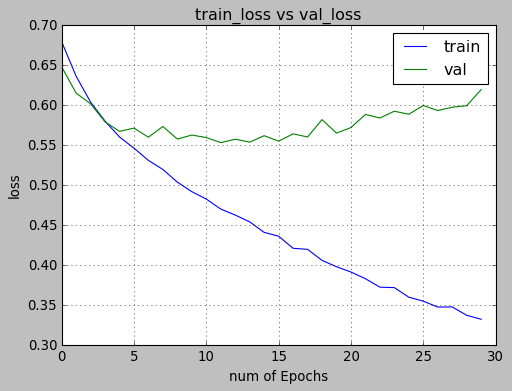

In [16]:
train_loss=HistoryOfModel1.history['loss']
val_loss=HistoryOfModel1.history['val_loss']
train_acc=HistoryOfModel1.history['acc']
val_acc=HistoryOfModel1.history['val_acc']
xc=range(epochs)
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])


### Building Convolutional Neural Network   Model 2
#### Increase batch size 512 , epoch 36 , Change First Conv2D Filter Size 32 Adam optimizer Default Learning Rate

In [20]:
model1 = Sequential()
model1.add(Conv2D(kernel_size=(3,3),filters=32,input_shape=(im_width, im_height,1),activation="relu",padding="valid"))
model1.add(Conv2D(kernel_size=(3,3),filters=10,activation="relu",padding="same"))
model1.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model1.add(Conv2D(kernel_size=(3,3),filters=3,activation="relu",padding="same"))
model1.add(Conv2D(kernel_size=(5,5),filters=5,activation="relu",padding="same"))
model1.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model1.add(Conv2D(kernel_size=(2,2),strides=(2,2),filters=10))
model1.add(Flatten())
model1.add(Dropout(0.2))
model1.add(Dense(122,activation="sigmoid"))
model1.add(Dense(1,activation="sigmoid"))
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 62, 62, 10)        2890      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 10)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 31, 31, 3)         273       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 31, 31, 5)         380       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 5)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 10)          210       
__________

In [26]:
model1.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
batchsize=512
epochs=36

In [27]:
historydata2 = model1.fit(data,labels, batch_size=512, epochs=36, validation_split = 0.25, verbose=1)


Train on 18750 samples, validate on 6250 samples
Epoch 1/36
18750/18750 [==============================] - 41s 2ms/step - loss: 0.6446 - acc: 0.6465 - val_loss: 0.9528 - val_acc: 0.1322
Epoch 2/36
18750/18750 [==============================] - 31s 2ms/step - loss: 0.6067 - acc: 0.6717 - val_loss: 0.8346 - val_acc: 0.3736
Epoch 3/36
18750/18750 [==============================] - 31s 2ms/step - loss: 0.5985 - acc: 0.6804 - val_loss: 1.0650 - val_acc: 0.1613
Epoch 4/36
18750/18750 [==============================] - 31s 2ms/step - loss: 0.5848 - acc: 0.6922 - val_loss: 0.8024 - val_acc: 0.4813
Epoch 5/36
18750/18750 [==============================] - 31s 2ms/step - loss: 0.5743 - acc: 0.7051 - val_loss: 0.7802 - val_acc: 0.5104
Epoch 6/36
18750/18750 [==============================] - 31s 2ms/step - loss: 0.5620 - acc: 0.7107 - val_loss: 0.8812 - val_acc: 0.4282
Epoch 7/36
18750/18750 [==============================] - 31s 2ms/step - loss: 0.5645 - acc: 0.7113 - val_loss: 0.8371 - val_acc:

In [28]:
(loss, accuracy) = model1.evaluate(data,labels, batch_size=512, verbose=1)


25000/25000 [==============================] - 16s 653us/step


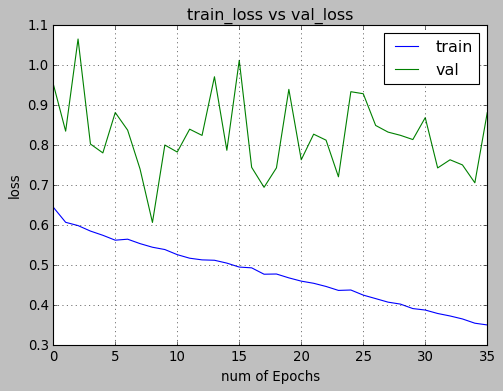

In [31]:
train_loss=historydata2.history['loss']
val_loss=historydata2.history['val_loss']
train_acc=historydata2.history['acc']
val_acc=historydata2.history['val_acc']
xc=range(epochs)
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

## Building Convolutional Neural Network  Model  Architecture 3
#### batch size 512 , epoch 15  ,Change Optimize   rmsprop (full-batch optimization) Default Learning Rate


In [37]:
model3 = Sequential()
model3.add(Conv2D(kernel_size=(3,3),filters=3,input_shape=(im_width, im_height,1),activation="relu",padding="valid"))
model3.add(Conv2D(kernel_size=(3,3),filters=10,activation="relu",padding="same"))
model3.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model3.add(Conv2D(kernel_size=(3,3),filters=3,activation="relu",padding="same"))
model3.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model3.add(Conv2D(kernel_size=(2,2),strides=(2,2),filters=10))
model3.add(Flatten())
model3.add(Dropout(0.2))
model3.add(Dense(100,activation="sigmoid"))
model3.add(Dense(1,activation="sigmoid"))
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 62, 62, 3)         30        
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 62, 62, 10)        280       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 31, 10)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 31, 31, 3)         273       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 3)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 7, 7, 10)          130       
_________________________________________________________________
flatten_4 (Flatten)          (None, 490)               0         
__________

In [38]:
model3.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
batchsize=512
epochs=15

In [39]:
HistoryOfModel3 = model3.fit(X_train,Y_train, batch_size=batchsize, epochs=epochs, validation_data=(X_val,Y_val), verbose=1)


Train on 20000 samples, validate on 5000 samples
Epoch 1/15
20000/20000 [==============================] - 18s 878us/step - loss: 0.6940 - acc: 0.5468 - val_loss: 0.7044 - val_acc: 0.5536
Epoch 2/15
20000/20000 [==============================] - 13s 656us/step - loss: 0.6685 - acc: 0.5872 - val_loss: 0.6578 - val_acc: 0.6078
Epoch 3/15
20000/20000 [==============================] - 13s 670us/step - loss: 0.6545 - acc: 0.6116 - val_loss: 0.7545 - val_acc: 0.5452
Epoch 4/15
20000/20000 [==============================] - 13s 662us/step - loss: 0.6380 - acc: 0.6336 - val_loss: 0.6280 - val_acc: 0.6512
Epoch 5/15
20000/20000 [==============================] - 14s 682us/step - loss: 0.6170 - acc: 0.6582 - val_loss: 0.6201 - val_acc: 0.6592
Epoch 6/15
20000/20000 [==============================] - 13s 658us/step - loss: 0.6036 - acc: 0.6716 - val_loss: 0.6314 - val_acc: 0.6450
Epoch 7/15
20000/20000 [==============================] - 13s 659us/step - loss: 0.5972 - acc: 0.6800 - val_loss: 0.6

In [40]:
score1 = model3.evaluate(X_val, Y_val, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 0.6125832294464111
Test accuracy: 0.6664


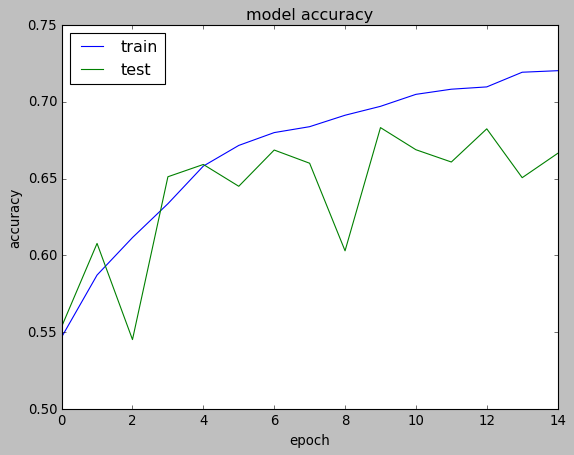

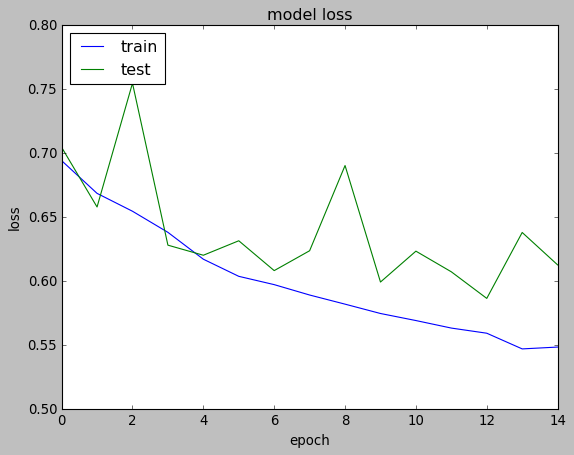

In [41]:
#accuracy
plt.plot(HistoryOfModel3.history['acc'])
plt.plot(HistoryOfModel3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(HistoryOfModel3.history['loss'])
plt.plot(HistoryOfModel3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Building Convolutional Neural Network  Model  Architecture 4
#### batch size 512 , epoch 15 ,Change 2nd last Dense layer activation function to Add more Linearity ,Change Optimize  Adam Default Learning Rate


In [66]:
model4 = Sequential()
model4.add(Conv2D(kernel_size=(3,3),filters=32,input_shape=(im_width, im_height,1),activation="relu",padding="valid"))
model4.add(Conv2D(kernel_size=(3,3),filters=10,activation="relu",padding="same"))
model4.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model4.add(Conv2D(kernel_size=(5,5),filters=5,activation="relu",padding="same"))
model4.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model4.add(Conv2D(kernel_size=(2,2),strides=(2,2),filters=10))
model4.add(Flatten())
model4.add(Dropout(0.2))
model4.add(Dense(100,activation="relu"))
model4.add(Dense(1,activation="sigmoid"))
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 62, 62, 32)        320       
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 62, 62, 10)        2890      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 31, 31, 10)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 31, 31, 5)         1255      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 15, 15, 5)         0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 7, 7, 10)          210       
_________________________________________________________________
flatten_13 (Flatten)         (None, 490)               0         
__________

In [67]:
model4.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
batchsize=512
epochs=15

In [68]:
HistoryOfModel4 = model4.fit(X_train,Y_train, batch_size=batchsize, epochs=epochs, validation_data=(X_val,Y_val), verbose=1)


Train on 20000 samples, validate on 5000 samples
Epoch 1/15
20000/20000 [==============================] - 34s 2ms/step - loss: 1.2058 - acc: 0.5107 - val_loss: 0.6925 - val_acc: 0.5300
Epoch 2/15
20000/20000 [==============================] - 32s 2ms/step - loss: 0.6922 - acc: 0.5238 - val_loss: 0.6894 - val_acc: 0.5418
Epoch 3/15
20000/20000 [==============================] - 32s 2ms/step - loss: 0.6864 - acc: 0.5433 - val_loss: 0.6858 - val_acc: 0.5522
Epoch 4/15
20000/20000 [==============================] - 32s 2ms/step - loss: 0.6826 - acc: 0.5608 - val_loss: 0.6831 - val_acc: 0.5568
Epoch 5/15
20000/20000 [==============================] - 32s 2ms/step - loss: 0.6782 - acc: 0.5714 - val_loss: 0.6753 - val_acc: 0.5820
Epoch 6/15
20000/20000 [==============================] - 32s 2ms/step - loss: 0.6688 - acc: 0.5911 - val_loss: 0.6685 - val_acc: 0.5908
Epoch 7/15
20000/20000 [==============================] - 31s 2ms/step - loss: 0.6584 - acc: 0.6047 - val_loss: 0.6591 - val_acc:

In [69]:
score1 = model4.evaluate(X_val, Y_val, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 0.6378543869018555
Test accuracy: 0.6292


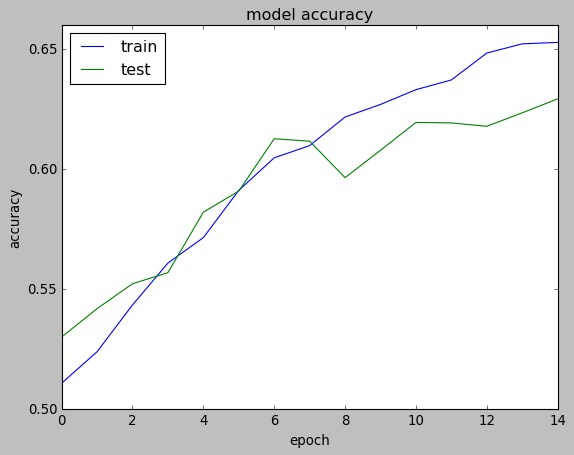

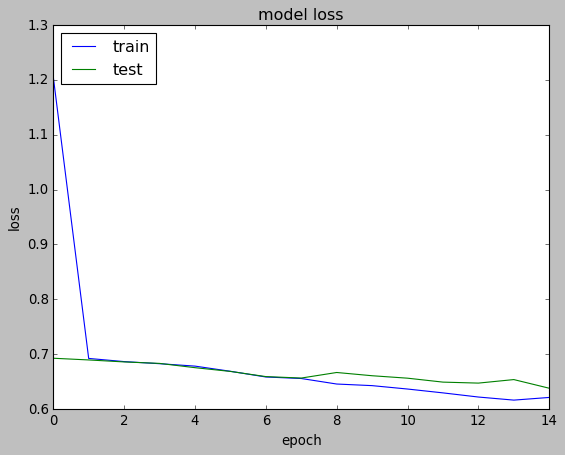

In [70]:
#accuracy
plt.plot(HistoryOfModel4.history['acc'])
plt.plot(HistoryOfModel4.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(HistoryOfModel4.history['loss'])
plt.plot(HistoryOfModel4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Building Convolutional Neural Network  Model  Architecture 5
#### batch size 512 ,Change 2nd last Dense layer sigmoid activation function ,Change Optimize  rmsprop Default Learning Rate

In [99]:
model5 = Sequential()
model5.add(Conv2D(kernel_size=(3,3),filters=3,input_shape=(im_width, im_height,1),activation="relu",padding="valid"))
model5.add(Conv2D(kernel_size=(3,3),filters=10,activation="relu",padding="same"))
model5.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model5.add(Conv2D(kernel_size=(3,3),filters=3,activation="relu",padding="same"))
model5.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model5.add(Conv2D(kernel_size=(2,2),strides=(2,2),filters=10))
model5.add(Flatten())
model5.add(Dropout(0.5))
model5.add(Dense(100,activation="sigmoid"))
model5.add(Dense(1,activation="sigmoid"))
model5.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_97 (Conv2D)           (None, 62, 62, 3)         30        
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 62, 62, 10)        280       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 31, 31, 10)        0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 31, 31, 3)         273       
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 15, 15, 3)         0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 7, 7, 10)          130       
_________________________________________________________________
flatten_24 (Flatten)         (None, 490)               0         
__________

In [100]:
#model5.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
model5.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
epochs=10
batchsize=512

In [101]:
HistoryOfModel5 = model5.fit(X_train,Y_train, batch_size=batchsize, epochs=epochs, validation_data=(X_val,Y_val), verbose=1)


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 15s 760us/step - loss: 0.7204 - acc: 0.5084 - val_loss: 0.7256 - val_acc: 0.4968
Epoch 2/10
20000/20000 [==============================] - 13s 652us/step - loss: 0.6995 - acc: 0.5176 - val_loss: 0.7001 - val_acc: 0.5086
Epoch 3/10
20000/20000 [==============================] - 13s 657us/step - loss: 0.6876 - acc: 0.5507 - val_loss: 0.6824 - val_acc: 0.5640
Epoch 4/10
20000/20000 [==============================] - 13s 653us/step - loss: 0.6775 - acc: 0.5740 - val_loss: 0.7071 - val_acc: 0.5340
Epoch 5/10
20000/20000 [==============================] - 13s 668us/step - loss: 0.6622 - acc: 0.6015 - val_loss: 0.6566 - val_acc: 0.5998
Epoch 6/10
20000/20000 [==============================] - 13s 667us/step - loss: 0.6507 - acc: 0.6184 - val_loss: 0.7626 - val_acc: 0.5228
Epoch 7/10
20000/20000 [==============================] - 14s 714us/step - loss: 0.6405 - acc: 0.6298 - val_loss: 0.8

In [102]:
score = model5.evaluate(X_val, Y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7507293525695801
Test accuracy: 0.5538


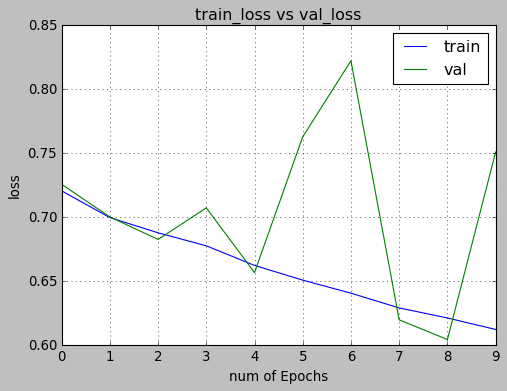

In [103]:
train_loss=HistoryOfModel5.history['loss']
val_loss=HistoryOfModel5.history['val_loss']
train_acc=HistoryOfModel5.history['acc']
val_acc=HistoryOfModel5.history['val_acc']
xc=range(epochs)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])


In [220]:
from keras.regularizers import l2
from keras import regularizers


## Building Convolutional Neural Network  Model  Architecture 6
#### batch size 512 ,Change epochs 30,Change First Dense layer relu activation function and neuron 128 ,Change Filter Size 64 64 16 16 64

In [221]:
model5 = Sequential()
model5.add(Conv2D(kernel_size=(3,3),filters=64,input_shape=(64, 64,1),activation="relu",padding="valid"))
model5.add(Conv2D(kernel_size=(3,3),filters=64,activation="relu",padding="same"))
model5.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model5.add(Conv2D(kernel_size=(3,3),filters=16,activation="relu",padding="same"))
model5.add(Conv2D(kernel_size=(3,3),filters=16,activation="relu",padding="same"))
model5.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model5.add(Conv2D(kernel_size=(2,2),strides=(2,2),filters=64))
model5.add(Flatten())
model5.add(Dropout(0.6))
model5.add(Dense(128,activation="relu",kernel_regularizer=regularizers.l2(0.09)))
model5.add(Dense(1,activation="sigmoid"))

In [222]:
#model3.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
batchsize=64
epochs=30

In [225]:
model5.compile(loss=keras.losses.mean_squared_error,optimizer=keras.optimizers.SGD(lr=0.009,momentum=0.7),metrics=['accuracy'])

In [226]:
HistoryOfModel5 = model5.fit(X_train,Y_train, batch_size=batchsize, epochs=epochs, validation_data=(X_val,Y_val), verbose=1)

Train on 20000 samples, validate on 5000 samples
Epoch 1/30
20000/20000 [==============================] - 110s 6ms/step - loss: 0.5386 - acc: 0.5853 - val_loss: 0.2780 - val_acc: 0.5932
Epoch 2/30
20000/20000 [==============================] - 110s 6ms/step - loss: 0.2547 - acc: 0.6080 - val_loss: 0.2410 - val_acc: 0.6412
Epoch 3/30
20000/20000 [==============================] - 109s 5ms/step - loss: 0.2420 - acc: 0.6239 - val_loss: 0.2347 - val_acc: 0.6548
Epoch 4/30
20000/20000 [==============================] - 110s 5ms/step - loss: 0.2345 - acc: 0.6501 - val_loss: 0.2341 - val_acc: 0.6440
Epoch 5/30
20000/20000 [==============================] - 111s 6ms/step - loss: 0.2305 - acc: 0.6584 - val_loss: 0.2334 - val_acc: 0.6542
Epoch 6/30
20000/20000 [==============================] - 109s 5ms/step - loss: 0.2261 - acc: 0.6676 - val_loss: 0.2215 - val_acc: 0.6764
Epoch 7/30
20000/20000 [==============================] - 110s 5ms/step - loss: 0.2237 - acc: 0.6794 - val_loss: 0.2456 - v

In [227]:
score = model5.evaluate(X_val, Y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.17584312160015106
Test accuracy: 0.787


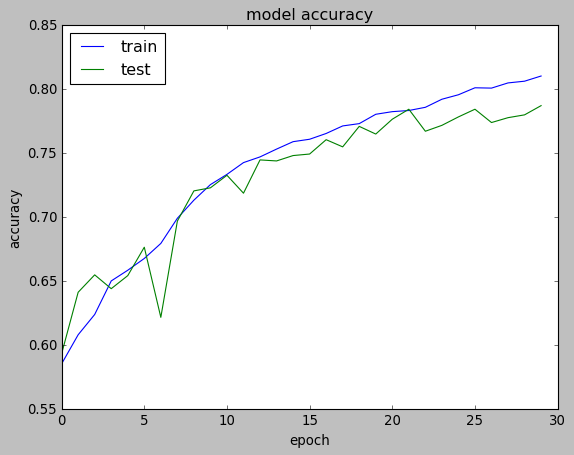

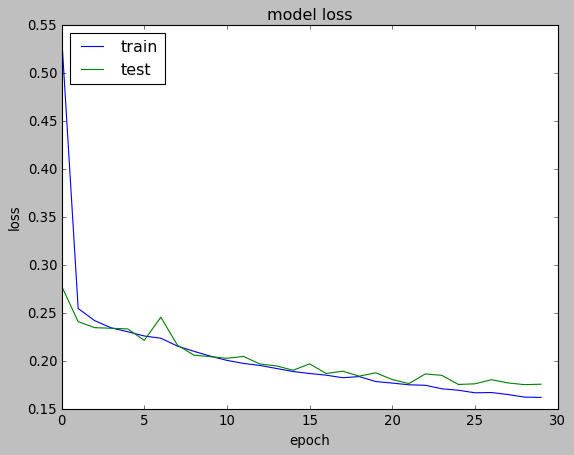

In [228]:
plt.plot(HistoryOfModel5.history['acc'])
plt.plot(HistoryOfModel5.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(HistoryOfModel5.history['loss'])
plt.plot(HistoryOfModel5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Change fit_generator(Trains the model on data generated batch-by-batch)

# Building Convolutional Neural Network  Model  Architecture 7

In [164]:
trainDataGenerate = ImageDataGenerator(rescale = 1./255,shear_range = 0.22,zoom_range = 0.20,horizontal_flip = True)
testDataGenerate = ImageDataGenerator(rescale = 1./255)

In [165]:
trainingSetData = trainDataGenerate.flow_from_directory('TrainSetData', target_size = (im_width, im_height),batch_size = 32,class_mode = 'binary')
testintSetData = testDataGenerate.flow_from_directory('TestingSetData',target_size = (im_width, im_height),batch_size = 32,class_mode = 'binary')

Found 10002 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [166]:
model6 = Sequential()
model6.add(Conv2D(32, (3, 3), input_shape = (im_width, im_height, 3), activation = 'relu'))
model6.add(MaxPooling2D(pool_size = (2, 2)))
model6.add(Conv2D(kernel_size=(5,5),filters=5,activation="relu",padding="same"))
model6.add(Conv2D(kernel_size=(3,3),filters=32,activation="relu",padding="same"))
model6.add(Conv2D(32, (3, 3), activation = 'relu'))
model6.add(MaxPooling2D(pool_size = (2, 2)))
model6.add(Flatten())
model6.add(Dense(128,activation="relu"))
model6.add(Dense(1,activation="sigmoid"))
model6.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model6.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_112 (Conv2D)          (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 31, 31, 5)         4005      
_________________________________________________________________
conv2d_114 (Conv2D)          (None, 31, 31, 32)        1472      
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_28 (Flatten)         (None, 6272)              0         
__________

### numberOfSamples=10002,testingSample=2000,stepsPerEpoch=800,epochs=40,batchsize=256

In [168]:
numberOfSamples=10002
testingSample=2000
stepsPerEpoch=800
epochs=40
batchsize=256

In [169]:
historyData6=model6.fit_generator(trainingSetData,steps_per_epoch = numberOfSamples // batchsize ,epochs = epochs,validation_data = testintSetData,validation_steps = testingSample // batchsize)

Epoch 1/40
39/39 [==============================] - 9s 231ms/step - loss: 0.7041 - acc: 0.5096 - val_loss: 0.6910 - val_acc: 0.5089
Epoch 2/40
39/39 [==============================] - 6s 159ms/step - loss: 0.6944 - acc: 0.4984 - val_loss: 0.6943 - val_acc: 0.4821
Epoch 3/40
39/39 [==============================] - 7s 180ms/step - loss: 0.6937 - acc: 0.5200 - val_loss: 0.6923 - val_acc: 0.4955
Epoch 4/40
39/39 [==============================] - 7s 174ms/step - loss: 0.6915 - acc: 0.5353 - val_loss: 0.6871 - val_acc: 0.5402
Epoch 5/40
39/39 [==============================] - 8s 196ms/step - loss: 0.6923 - acc: 0.5136 - val_loss: 0.6885 - val_acc: 0.5580
Epoch 6/40
39/39 [==============================] - 8s 208ms/step - loss: 0.6893 - acc: 0.5304 - val_loss: 0.6878 - val_acc: 0.5446
Epoch 7/40
39/39 [==============================] - 7s 184ms/step - loss: 0.6838 - acc: 0.5681 - val_loss: 0.6768 - val_acc: 0.5670
Epoch 8/40
39/39 [==============================] - 7s 180ms/step - loss: 0.

In [170]:
print(len(trainingSetData))

313


In [171]:
[loss,accuracy] = model6.evaluate_generator(testintSetData, steps=313, max_queue_size=10, workers=0, use_multiprocessing=False)

In [174]:
print(accuracy)

0.7473832528180354


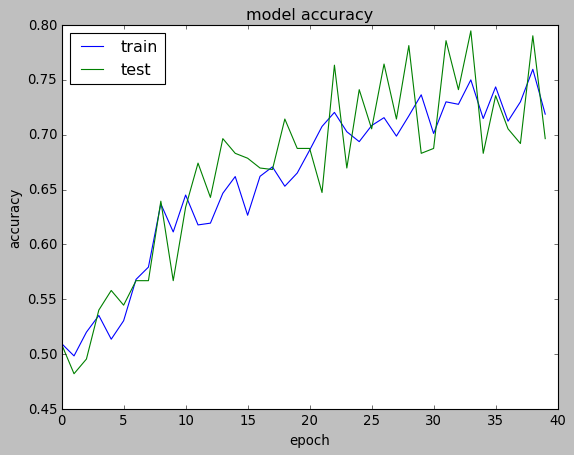

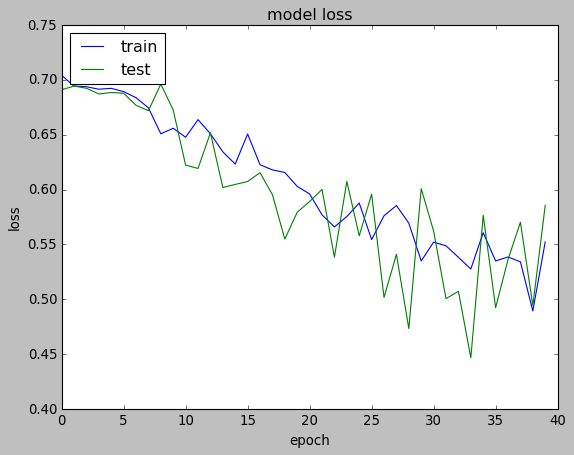

In [173]:
#accuracy
plt.plot(historyData6.history['acc'])
plt.plot(historyData6.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(historyData6.history['loss'])
plt.plot(historyData6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Building Convolutional Neural Network  Model  Architecture 8


In [229]:
trainDataGenerate = ImageDataGenerator(rescale = 1./255,shear_range = 0.22,zoom_range = 0.20,horizontal_flip = True)
testDataGenerate = ImageDataGenerator(rescale = 1./255)


In [176]:
trainingSetData = trainDataGenerate.flow_from_directory('TrainSetData', target_size = (im_width, im_height),batch_size = 32,class_mode = 'binary')
testintSetData = testDataGenerate.flow_from_directory('TestingSetData',target_size = (im_width, im_height),batch_size = 32,class_mode = 'binary')

Found 10002 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [177]:
model7 = Sequential()
model7.add(Conv2D(32, (3, 3), input_shape = (im_width, im_height, 3), activation = 'relu'))
model7.add(MaxPooling2D(pool_size = (2, 2)))
#model7.add(Conv2D(kernel_size=(5,5),filters=5,activation="relu",padding="same"))
model7.add(Conv2D(kernel_size=(3,3),filters=32,activation="relu",padding="same"))
model7.add(Conv2D(32, (3, 3), activation = 'relu'))
model7.add(MaxPooling2D(pool_size = (2, 2)))
model7.add(Flatten())
model7.add(Dense(128,activation="relu"))
model7.add(Dense(1,activation="sigmoid"))
model7.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model7.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_116 (Conv2D)          (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 31, 31, 32)        9248      
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_29 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_54 (Dense)             (None, 128)               802944    
__________

In [185]:
numberOfSamples=10002
testingSample=2000
stepsPerEpoch=800
epochs=40
batchsize=128

In [186]:
historyData=model7.fit_generator(trainingSetData,steps_per_epoch = numberOfSamples // batchsize ,epochs = epochs,validation_data = testintSetData,validation_steps = testingSample // batchsize)

Epoch 1/40
78/78 [==============================] - 13s 170ms/step - loss: 0.4733 - acc: 0.7683 - val_loss: 0.5193 - val_acc: 0.7438
Epoch 2/40
78/78 [==============================] - 14s 181ms/step - loss: 0.4668 - acc: 0.7740 - val_loss: 0.5017 - val_acc: 0.7759
Epoch 3/40
78/78 [==============================] - 17s 219ms/step - loss: 0.4584 - acc: 0.7784 - val_loss: 0.4934 - val_acc: 0.7792
Epoch 4/40
78/78 [==============================] - 19s 240ms/step - loss: 0.4763 - acc: 0.7748 - val_loss: 0.4603 - val_acc: 0.7917
Epoch 5/40
78/78 [==============================] - 15s 193ms/step - loss: 0.4518 - acc: 0.7928 - val_loss: 0.5248 - val_acc: 0.7542
Epoch 6/40
78/78 [==============================] - 16s 211ms/step - loss: 0.4357 - acc: 0.7993 - val_loss: 0.4507 - val_acc: 0.7866
Epoch 7/40
78/78 [==============================] - 15s 196ms/step - loss: 0.4485 - acc: 0.7901 - val_loss: 0.5738 - val_acc: 0.6958
Epoch 8/40
78/78 [==============================] - 17s 217ms/step - 

In [187]:
print(len(trainingSetData))

313


In [200]:
[loss,accuracy] = model7.evaluate_generator(testintSetData, steps=313, max_queue_size=10, workers=0, use_multiprocessing=False)

In [201]:
print("Acuracy:"+ str(accuracy))
print("loss:"+ str(loss))

Acuracy:0.8171296296296297
loss:0.4072199977826381


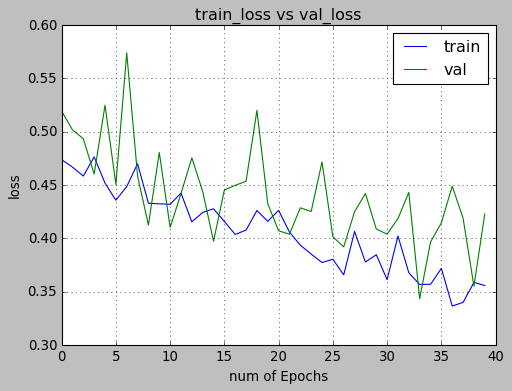

In [198]:
train_loss=historyData.history['loss']
val_loss=historyData.history['val_loss']
train_acc=historyData.history['acc']
val_acc=historyData.history['val_acc']
xc=range(epochs)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])



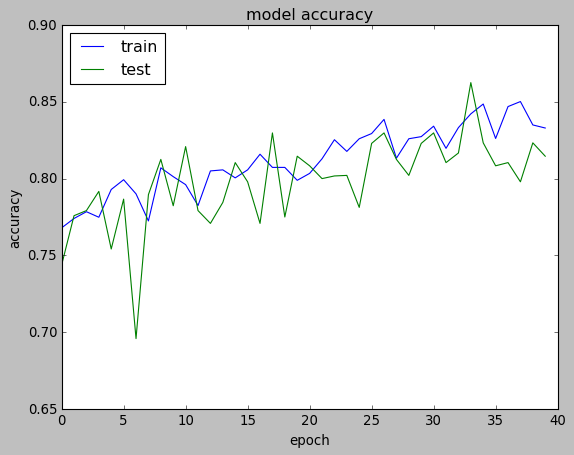

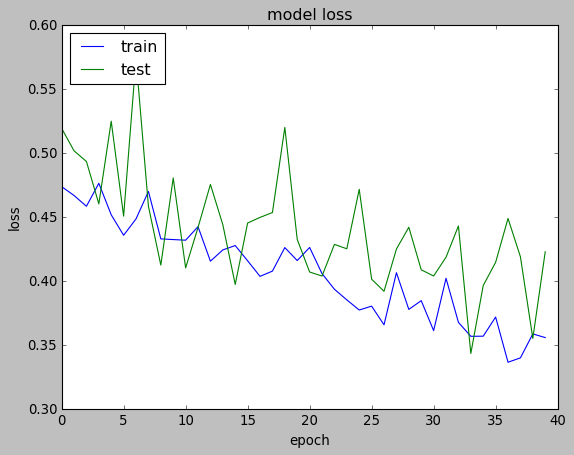

In [199]:
#accuracy
plt.plot(historyData.history['acc'])
plt.plot(historyData.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(historyData.history['loss'])
plt.plot(historyData.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#  CNN Model 8 
## Test Acuracy:0.8171296296296297 
## Test loss:0.4072199977826381

#  CNN Model 6 
## Test accuracy: 0.787
## Test loss: 0.17584312160015106

# CNN Model 1 is Provided Architecture
### Adam optimizer use with Default Learning Rate

# CNN Model 2 
### increase first Convolution layer Filter size 32 batch size 512....it make worst too much oscillation

# CNN Model 3 
### Change Optimize rmsprop (full-batch optimization) 
 

# CNN Model 4 
#### Change 1st Dense layer activation relu function to Add more Linearity ,Change Optimize  Adam Default Learning Rate
#### Remove Convolution layer to Avoid Overfit and Dropout(0.2)
###### 32 10 5 10 Filter


# CNN Model 5 
### Avoid over fit Increase Dropout(0.5) to  filter size  it does not improve accuracy

# CNN Model 6 
### After Some Change in filter 64 64 16 16 64   and Drop out increase 0.5 to 0.6  use SGD with 
## lr=0.009 to avoid oscillation use momentum=0.7
#### it give better accuracy

# CNN Model 7 
### fit_generator(Trains the model on data generated batch-by-batch)
### Increase data by data generation
#### numberOfSamples=10002, testingSample=2000 ,stepsPerEpoch=800,epochs=40,batchsize=256

# CNN Model 8 
#### Decrease 1 layer of ConvLayer also decrease  batchsize=128. it give ossicication in Train and Tst  but deacreasing Test loss and Improve Test Accuracy